In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from av import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from tensorboard.plugins.scalar.summary import scalar

In [2]:
file_paths={
        "data":"D:\Music Recommendation System\MusicRecommendationSystem\data\data.csv",
        "data_by_artist":"D:\Music Recommendation System\MusicRecommendationSystem\data\data_by_artist.csv",
        "data_by_genres":"D:\Music Recommendation System\data\data_by_genres.csv",
        "data_by_year":"D:\Music Recommendation System\data\data_by_year.csv",
        "data_w_genres":"D:\Music Recommendation System\data\data_w_genres.csv"
    }
data_sets = {name: pd.read_csv(path) for name, path in file_paths.items()}

In [3]:
for name, df in data_sets.items():
    print(f"\n=== Dataset: {name} ===")
    display(df.head())
    display(df.describe())
    display(df.info())
    print(f"Shape: {df.shape}")


=== Dataset: data ===


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

None

Shape: (170653, 19)

=== Dataset: data_by_artist ===


,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


,mode,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,28680.000000,28680.000000,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.759170,13.847211,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901
std,0.427595,53.372544,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552
min,0.000000,1.000000,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000
50%,1.000000,3.000000,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000
75%,1.000000,8.000000,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000
max,1.000000,3169.000000,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


None

Shape: (28680, 15)

=== Dataset: data_by_genres ===


,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


None

Shape: (2973, 14)

=== Dataset: data_by_year ===


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,1.0,1970.500000,0.556317,0.536783,227296.752234,0.452705,0.193582,0.208224,-11.969054,0.105861,116.015674,0.532120,27.376065,3.7900
std,0.0,29.011492,0.275358,0.052356,25630.048065,0.161738,0.122488,0.017903,3.105610,0.082128,5.669645,0.057809,20.703197,3.5627
min,1.0,1921.000000,0.219931,0.414445,156881.657475,0.207948,0.016376,0.168450,-19.275282,0.049098,100.884521,0.379327,0.140845,0.0000
25%,1.0,1945.750000,0.289516,0.500800,210889.193536,0.280733,0.103323,0.197509,-14.189232,0.064244,111.718626,0.497174,3.298200,0.0000
50%,1.0,1970.500000,0.459190,0.540976,235520.850833,0.495997,0.127644,0.206074,-11.773061,0.085763,117.455548,0.541503,33.619250,2.0000
75%,1.0,1995.250000,0.856711,0.570948,247702.738058,0.598008,0.276707,0.218493,-9.950542,0.104438,120.606644,0.570080,44.943375,7.0000
max,1.0,2020.000000,0.962607,0.692904,267677.823086,0.681778,0.581701,0.264335,-6.595067,0.490001,124.283129,0.663725,65.256542,10.0000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


None

Shape: (100, 14)

=== Dataset: data_w_genres ===


,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901,0.759170,13.847211
std,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552,0.427595,53.372544
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000,1.000000,2.000000
50%,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000,1.000000,3.000000
75%,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000,1.000000,8.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000,1.000000,3169.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

None

Shape: (28680, 16)


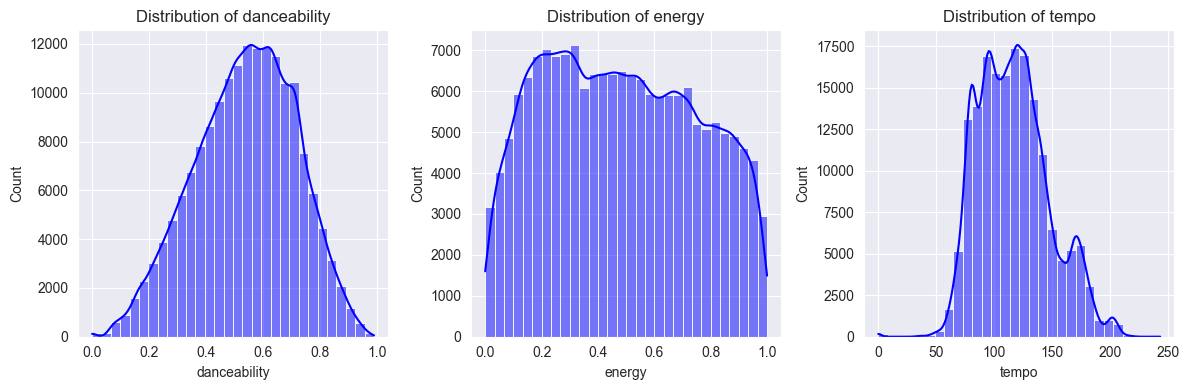

In [4]:
Features=["danceability","energy","tempo"]
plt.figure(figsize=(12,4))
for i,Feature in enumerate(Features):
    plt.subplot(1,3,i+1)
    sns.histplot(data_sets["data"][Feature],bins=30,kde=True,color="blue")
    plt.title(f"Distribution of {Feature}")

plt.tight_layout()
plt.show()

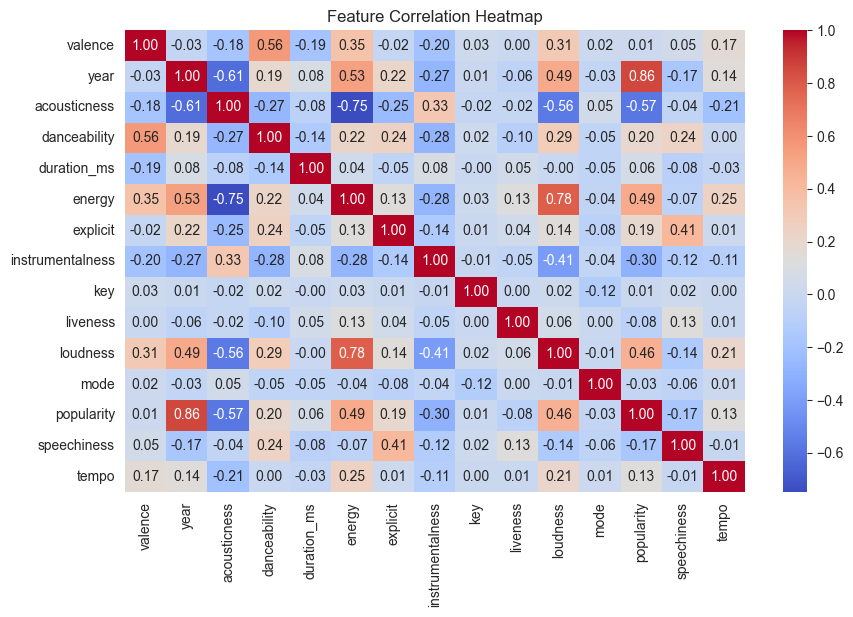

In [5]:
plt.figure(figsize=(10,6))
numeric_df = data_sets["data"].select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

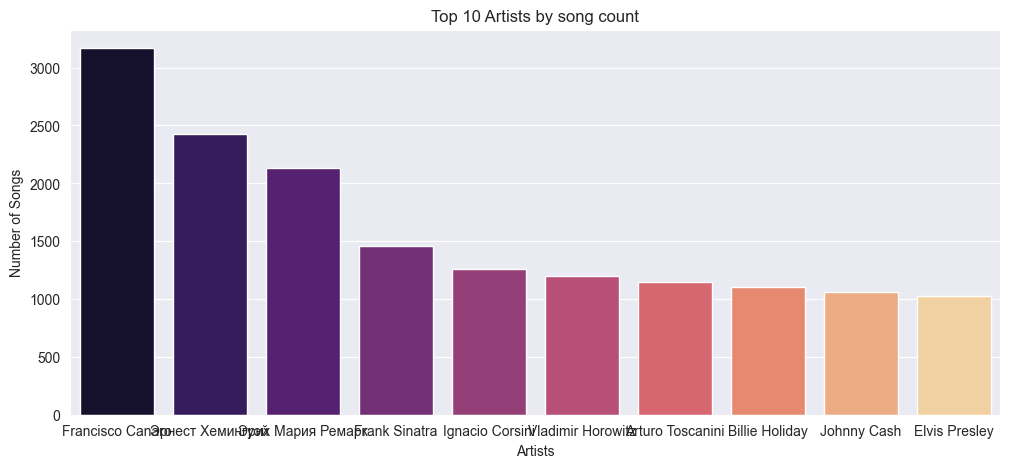

In [6]:
#Top 10 artists by song count
top_artists=data_sets["data_by_artist"].nlargest(10,"count")
plt.figure(figsize=(12,5))
sns.barplot(y=top_artists["count"],x=top_artists["artists"], hue=top_artists["artists"],palette="magma",legend=False)
plt.xlabel("Artists")
plt.ylabel("Number of Songs")
plt.title("Top 10 Artists by song count")
plt.show()

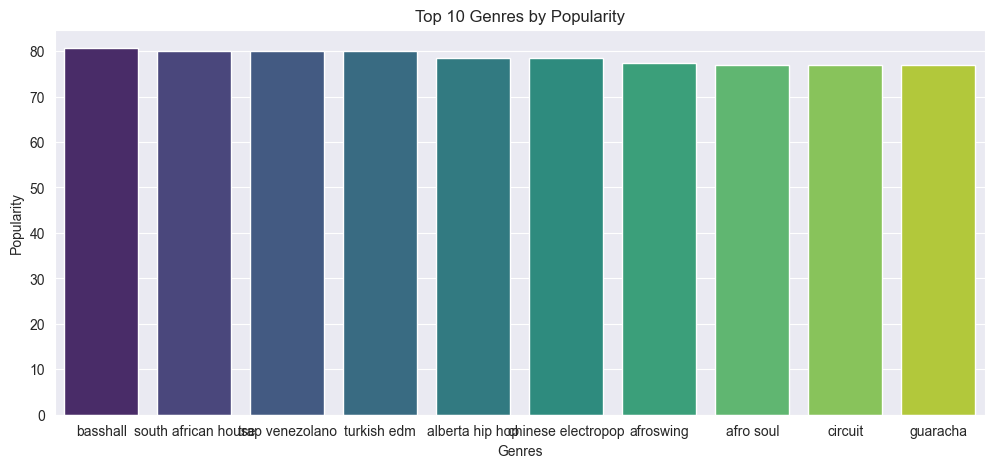

In [7]:
# Top 10 genres by popularity
top_genres = data_sets["data_by_genres"].nlargest(10, "popularity")

plt.figure(figsize=(12, 5))
sns.barplot(y=top_genres["popularity"], x=top_genres["genres"], hue=top_genres["genres"], palette="viridis", legend=False)
plt.xlabel("Genres")
plt.ylabel("Popularity")
plt.title("Top 10 Genres by Popularity")
plt.show()


In [8]:
feature=["danceability", "energy", "valence", "tempo", "acousticness", "instrumentalness", "liveness", "speechiness"]
scaler=MinMaxScaler()
for key in data_sets:
    if key!="data_w_genres":
        data_sets[key]=data_sets[key].dropna(subset=feature)
        data_sets[key][feature]=scaler.fit_transform(data_sets[key][feature])


In [9]:
models={}
for key in data_sets:
    if key!="data_w_genres":
        models[key]=NearestNeighbors(n_neighbors=6,metric="cosine")
        models[key].fit(data_sets[key][feature])


In [10]:
entity_type = "data"
entity = "Shape of You"
df = data_sets[entity_type]

column_mapping = {
    "data": "name",
    "data_by_artist": "artists",
    "data_by_genres": "genres",
    "data_by_year": "year"
}

if entity_type not in column_mapping:
    raise ValueError("Invalid dataset selection.")

column = column_mapping[entity_type]
if entity not in df[column].values:
    print(f"{entity_type} '{entity}' not found.")
else:
    top_n = 5
    idx = df[df[column] == entity].index[0]
    query_point = pd.DataFrame([df.loc[idx, feature].values], columns=feature)
    distances, indices = models[entity_type].kneighbors(query_point, n_neighbors=top_n + 1)
    recommendations = [df.iloc[i][column] for i in indices[0] if i != idx]
    recommendations = recommendations[:top_n]
    print(f"Recommendations for '{entity}':", recommendations)


Recommendations for 'Shape of You': ['Shape of You', 'Let Me Luv Your Girl', 'Así Se Compone Un Son', "Ain't Nothin' Wrong - 2004 Remaster", 'Andan Diciendo']


In [12]:
import joblib

# Save the trained models
for key, model in models.items():
    joblib.dump(model, f"{key}_model.pkl")

print("Models saved successfully!")


Models saved successfully!


In [23]:
from sklearn.metrics import mean_squared_error

# Get actual features
actual_features = df[feature].values

# Predict nearest neighbors for each song
predicted_features = []
for idx in range(len(df)):
    query_point = pd.DataFrame([df.iloc[idx][feature].values], columns=feature)
    _, indices = models["data"].kneighbors(query_point, n_neighbors=6)  # top 5 + itself
    predicted_features.append(df.iloc[indices[0][1:]][feature].mean().values)

# Compute MSE
mse = mean_squared_error(actual_features, predicted_features)
print(f"Mean Squared Error (MSE): {mse:.4f}")


KeyboardInterrupt: 

In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_model_cosine(model, df, feature, top_n=5):
    similarity_scores = []

    for idx in range(len(df)):
        # Ensure the query point has the correct feature names
        query_point = pd.DataFrame([df.iloc[idx][feature]], columns=feature)

        _, indices = model.kneighbors(query_point, n_neighbors=top_n + 1)

        # Compute cosine similarity between the original song and its recommendations
        recommended_vectors = df.iloc[indices[0][1:]][feature].values
        avg_similarity = np.mean(cosine_similarity(query_point, recommended_vectors))
        similarity_scores.append(avg_similarity)

    mean_similarity = np.mean(similarity_scores)
    print(f"Mean Cosine Similarity Score: {mean_similarity:.4f}")

# Example usage
evaluate_model_cosine(models["data"], data_sets["data"], feature)


KeyboardInterrupt: 